# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 20.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results


# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
rewards_table = []

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, reward, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        rewards_table.append(reward)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

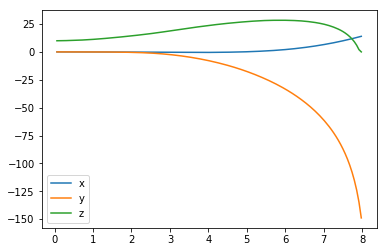

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

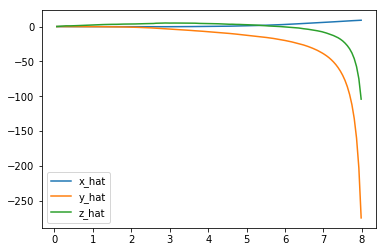

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

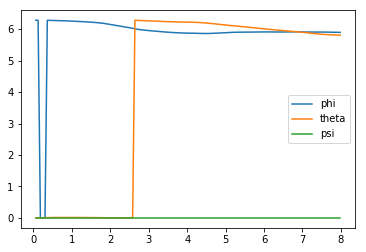

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

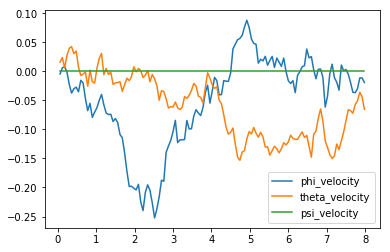

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

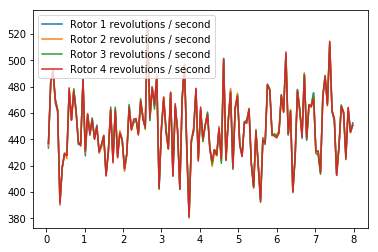

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  13.97242802 -148.91882594    0.            5.89763446    5.80775821
    0.        ]
[   9.09209332 -274.89787956 -104.25989707]
[-0.01920833 -0.06540238  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

Episode =    1, score =   6.817 (best =   6.817), noise_scale = 0.05

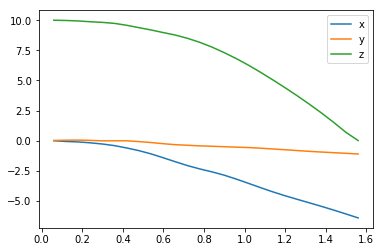

Episode =    3, score =   6.817 (best =   6.817), noise_scale = 0.05

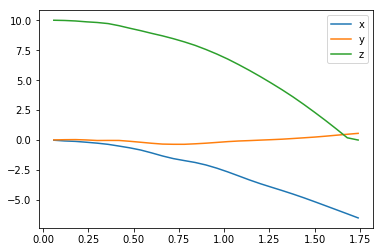

Episode =    4, score =   6.818 (best =   6.818), noise_scale = 0.025

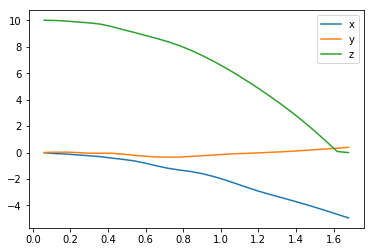

Episode =    5, score =   6.818 (best =   6.818), noise_scale = 0.0125

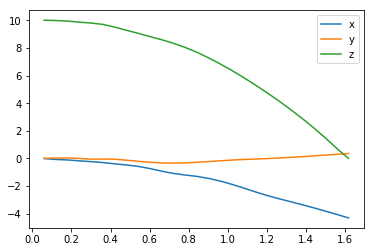

Episode =    8, score =   6.818 (best =   6.818), noise_scale = 0.025

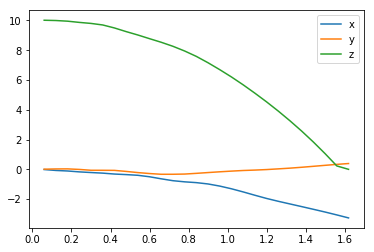

Episode =   10, score =   6.818 (best =   6.818), noise_scale = 0.025

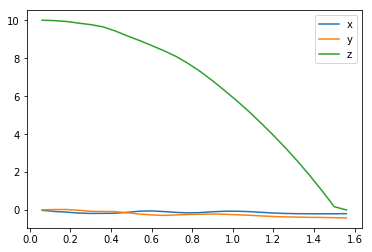

Episode =   43, score =   6.818 (best =   6.818), noise_scale = 1.65

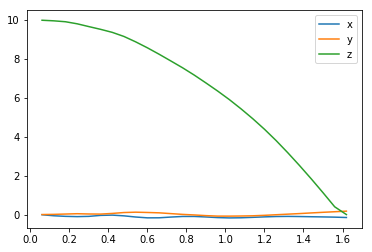

Episode =   64, score =   6.818 (best =   6.818), noise_scale = 1.6

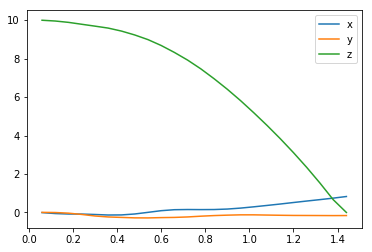

Episode =  504, score =   6.818 (best =   6.818), noise_scale = 1.6

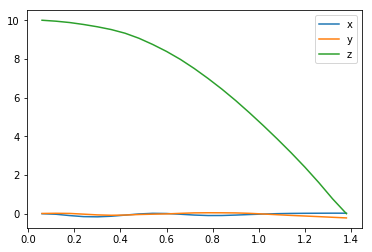

Episode = 1000, score =   6.818 (best =   6.818), noise_scale = 3.2

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task
import matplotlib.pyplot as plt
%matplotlib inline

num_episodes = 1000
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    results = {x : [] for x in labels}
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            if agent.score==agent.best_score:
                plt.plot(results['time'], results['x'], label='x')
                plt.plot(results['time'], results['y'], label='y')
                plt.plot(results['time'], results['z'], label='z')
                plt.legend()
                _ = plt.ylim()
                plt.show()
            break
    sys.stdout.flush()
    

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Episode =    1, score = 449.896 (best = 449.896)

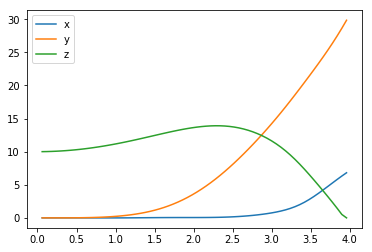

[ 6.8135264  29.8581162   0.          3.81077847  2.08818188  0.        ]
[  7.96425781  20.6393664  -16.54385352]
[ 1.7475965  -4.17583644  0.        ]
Episode =    2, score = 572.959 (best = 572.959)

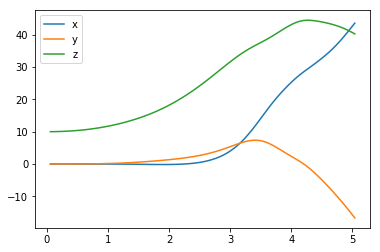

[ 43.61459354 -16.70316229  40.30706287   0.53696656   3.78628303
   0.        ]
[ 23.63892399 -24.47895563 -10.26011984]
[ 3.68162773 -2.85414849  0.        ]
Episode =   10, score = 573.069 (best = 573.069)

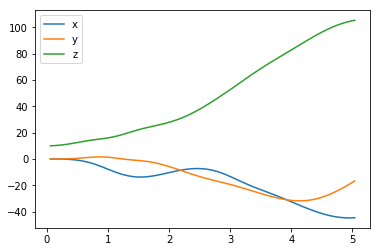

[-44.6592758  -16.69494063 105.44808051   5.32562171   4.13353355
   0.        ]
[ 3.20514422 28.40155189  8.55074513]
[1.05170357 1.01353499 0.        ]
Episode =  337, score = 573.090 (best = 573.090)

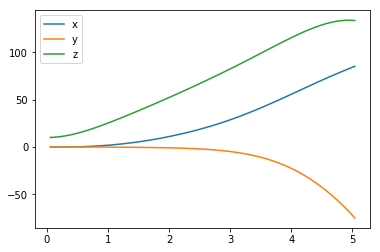

[ 85.22271596 -74.99906502 133.61405897   4.14134923   4.81519505
   0.        ]
[ 25.20628629 -72.57329187  -7.00363781]
[-0.63505753 -0.01321743  0.        ]
Episode =  342, score = 573.402 (best = 573.402)

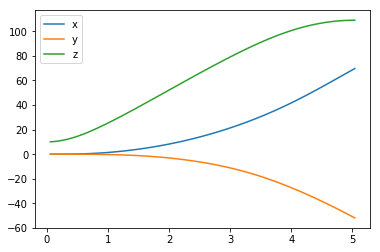

[ 69.67779299 -51.87929123 108.97523      4.24606778   4.884584
   0.        ]
[ 27.82162926 -26.54009228  -0.09802403]
[-0.35463955  0.07240658  0.        ]
Episode =  347, score = 573.824 (best = 573.824)

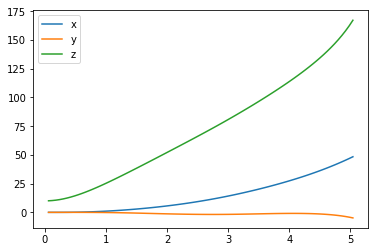

[ 48.39332813  -4.83578397 167.1761403    1.33726043   5.30690801
   0.        ]
[ 25.58252117 -11.51781669  83.98740683]
[ 0.42076258 -0.40634358  0.        ]
Episode =  349, score = 573.866 (best = 573.866)

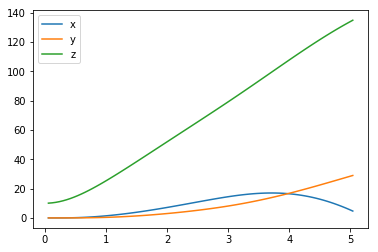

[  4.67780328  28.95426642 134.84820754   0.27210629   1.15894181
   0.        ]
[-18.85758147  12.12458574  22.30609607]
[-0.35977231  0.44315284  0.        ]
Episode =  356, score = 574.225 (best = 574.225)

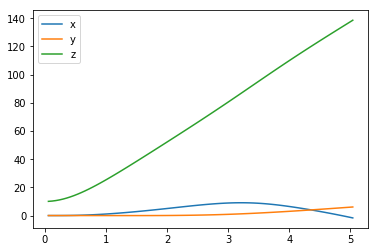

[ -1.67873764   6.07097019 138.56971943   6.27800035   0.32071504
   0.        ]
[-9.2720049   3.06444289 26.79013233]
[-0.11983879  0.12812912  0.        ]
Episode =  393, score = 574.237 (best = 574.237)

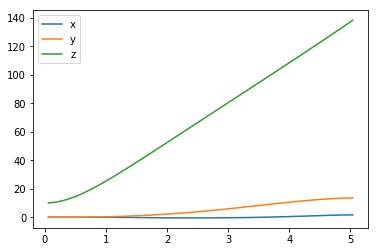

[  1.67129206  13.56543331 138.37508608   5.93460284   0.24087868
   0.        ]
[ 0.22141087  0.51998114 29.48576469]
[-0.40091157  0.37978861  0.        ]
Episode =  408, score = 574.336 (best = 574.336)

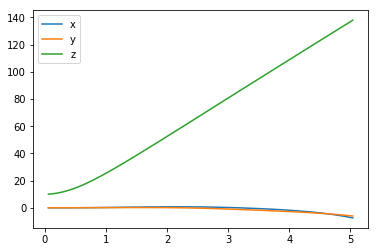

[ -7.45808115  -6.06155225 137.96324328   5.89080163   0.69897843
   0.        ]
[-9.2008005  -4.73615498 27.59069217]
[-0.33290477  0.5998748   0.        ]
Episode =  499, score = 574.355 (best = 574.355)

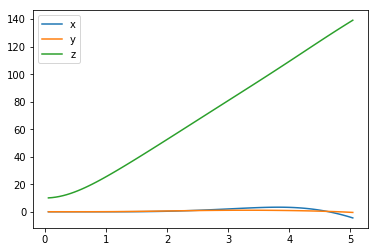

[ -4.48406713  -0.49295306 139.18967209   5.90297202   0.90171335
   0.        ]
[-13.87010169  -2.38826588  27.17782155]
[-0.47002485  0.21398545  0.        ]
Episode =  500, score = 491.499 (best = 574.355)

In [9]:
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
import csv
import matplotlib.pyplot as plt
%matplotlib inline

num_episodes = 500
target_pos = np.array([0., 0., 100.])
runtime = 5
task = Task(runtime=runtime,target_pos=target_pos)
agent = DDPG(task) 
best_score = float("-inf")

reward_labels = ['episode', 'reward']
reward_results = {x : [] for x in reward_labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    results = {x : [] for x in labels}
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        result = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(result[ii])
        state = next_state
        score += reward
        best_score = max(best_score, score)
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, score, best_score), end="")  # [debug]
            if score==best_score:
                plt.plot(results['time'], results['x'], label='x')
                plt.plot(results['time'], results['y'], label='y')
                plt.plot(results['time'], results['z'], label='z')
                plt.legend()
                _ = plt.ylim()
                plt.show()
                print(task.sim.pose)
                print(task.sim.v)
                print(task.sim.angular_v)
            break
    reward_results['episode'].append(i_episode)
    reward_results['reward'].append(score)
    sys.stdout.flush()

In [10]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 143.97767034 -150.          300.            5.65239947    4.28270419
    0.        ]
[ 2619.096716   -3470.64029363  4955.16933843]
[-0.35945343 -0.50657104  0.        ]


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

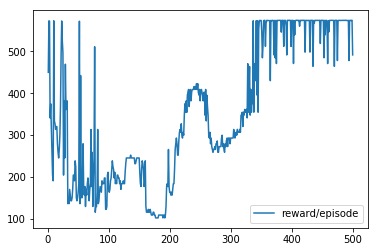

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(reward_results['episode'], reward_results['reward'], label='reward/episode')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task is to take off from a default initial postion [0,0,10] to the nearby area of a given target position. The reward function should be increase when the quadcopter is closer to the target poistion. The defaut reward function given in the sample code like  1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum() does not work very well. If we print out the xyz position, we can see the quadcopter always crash to the ground(z=0) and terminate the process. The suspection is that the absolute value of distance decay too quickly so we can use a relatively small coefficient in front of the absolution vaue of distance and use tanh or exp functions to transfer the distance value to a value between [-1,1]. .

I am using reward = np.tanh(1 - 0.0003*(abs(self.sim.pose[:3] - self.target_pos))).sum() here in my work here.

I also tried reward functions like np.exp(-0.0001*(abs(self.sim.pose[:3] - self.target_pos))). It also works well.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I use DDPG algorithm, which works great with continuous action spaces in this problem. I use propsed hyperparameters by the paper presented DDPG.

The final choice of hyperparameters are here:
- learning rate of actor network:0.0001
- learning rate of critic network:0.001
- Gamma: 0.99
- soft targe update rate: 0.001
- buffer size: 1000000
- minibatch size: 64
- sigma in Ornstein–Uhlenbeck process:0.3(weight more on random variables)
- theta in Ornstein–Uhlenbeck process:0.15

I use neural network in both actor and critic agent. In actor agent, two sets of dense + batch normaization + relu activation function are used. I tried dense layers  with 32/64 nodes and 400/300 nodes. The ones with more nodes give a relatively higher reward under the same reward function. So I choose to use the network with more nodes and speed is still quite good on udacity's server. And then I add final output layer with random uniform weigth initiallisation and sigmoid activation. In critic agent, the state pathway is the same with the actor agent. For action pathway, I use a fuly connect layer of 300 nodes and relu activation. Then they are combined and add relu activation.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:It takes a while to try the different reward functions and see how they work. Once you have a reasonable reward function, you are starting to have good learning results and the task is thus become easy.
To get the right reward function and understand how it works was the first aha moment. Implementing the neural networks in the agents is another aha moment where the big improvements of the training result are. Last but not least, the noise to be added during DDPG also matters quite a bit. With increase the sigma in Ornstein–Uhlenbeck process from 0.2 to 0.3, we can see a stabe increase in reward showing up in the later half of the first 500 episodes.

The results are acceptable to me. The rewards keeps in a pretty high stage after about 350 episode. From the plot of xyz position, we can see quadcopter almost going in a straight line from the initial position to target position. This fits with our understand of the physical rules.   

In [12]:
print("Final performance of (mean reward over last 10 episodes) is {}".format(np.sum(reward_results['reward'][-10:])/10))

Final performance of (mean reward over last 10 episodes) is 556.0790336848097


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:This is a sophisticated project giving students a good understand of implementing deep learning algorithms on a real world challenge. The challenging pieces are to understand the algorithm of DDPG, connect all the sample scripts to figure out the critical hyperparameters to test, figure out the problem with reward functions and find the place to implementing neural networks. 
The behavior of the quadcopter is really interesting. In the first few episodes, the quadcopter seems always drop on the ground. And then it suddenly starts to avoid hit the ground. As the learning continues, the quadcopter seems to finally find the target position. But it will fly over the position and then keep going in the way for a while. It is really fun to me and it triggers some further ideas of trying different reward function. The experience of such a project is really great.

